In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

In [37]:
saws_df = wrangle.wrangle_saws()

In [3]:
saws_df = wrangle.clean_saws(saws_df)

In [4]:
saws_avg = pd.DataFrame(saws_df.mean(axis=1))
saws_avg = saws_avg.rename(columns ={0:'gallons'})

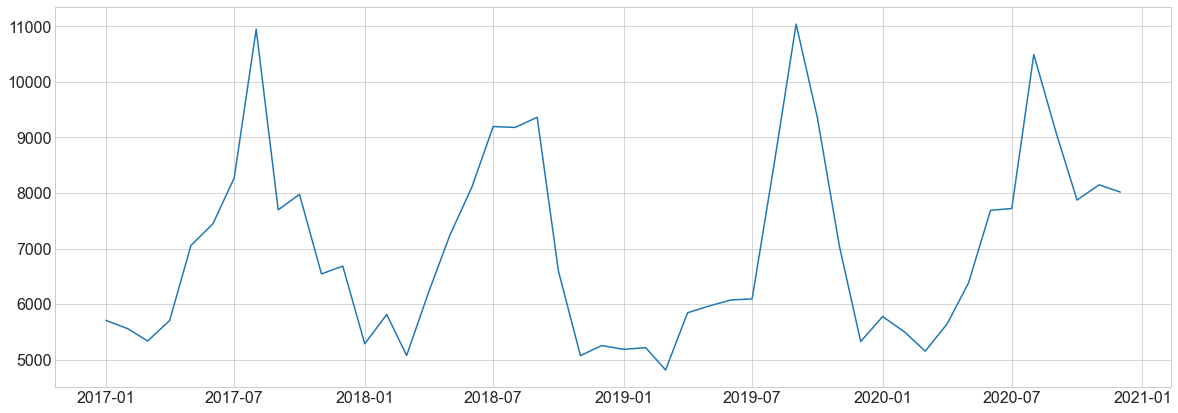

In [5]:
plt.rc('figure', figsize=(20, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)
plt.plot(saws_avg.index, saws_avg.gallons)

In [6]:
sound_df = wrangle.wrangle_sound()
sound_df = sound_df.set_index('DateTime')
sound_df = sound_df.sort_index()

In [7]:
sound_df

,NoiseLevel_db,noise_level
DateTime,,
2021-04-20 00:00:43,63,Moderate
2021-04-20 00:07:45,58,Moderate
2021-04-20 00:08:26,58,Moderate
2021-04-20 00:10:43,59,Moderate
2021-04-20 00:17:46,55,Moderate
...,...,...
2021-07-08 23:56:14,66,Moderate
2021-07-08 23:56:14,65,Moderate
2021-07-08 23:59:13,66,Moderate


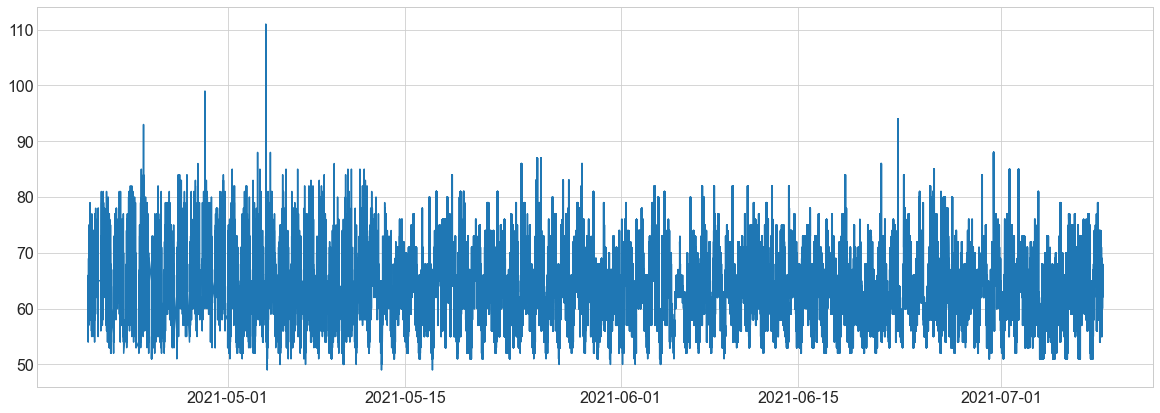

In [8]:
plt.plot(sound_df.index, sound_df.NoiseLevel_db)

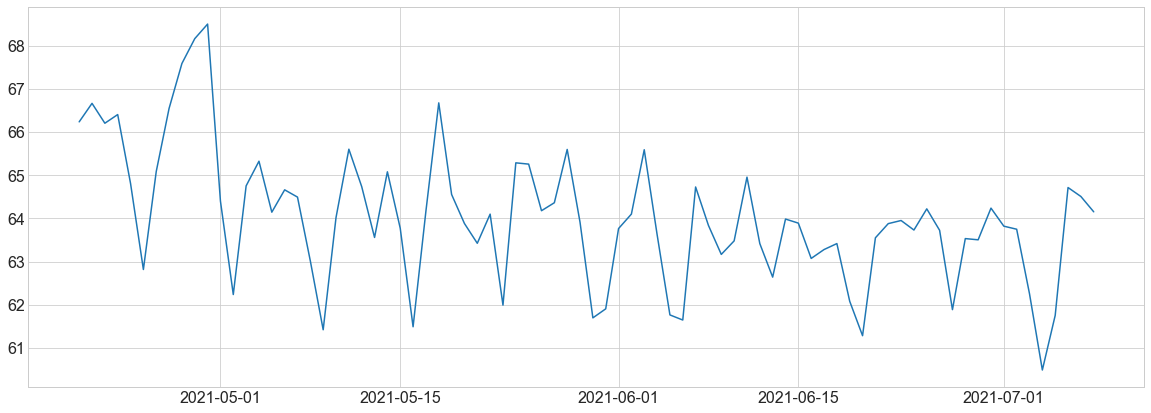

In [9]:
plt.plot(sound_df.resample('D').mean())

[Text(0.5, 1.0, 'Average Noise Level by Hour'),
 Text(0.5, 0, 'Hour'),
 Text(0, 0.5, 'Decibels')]

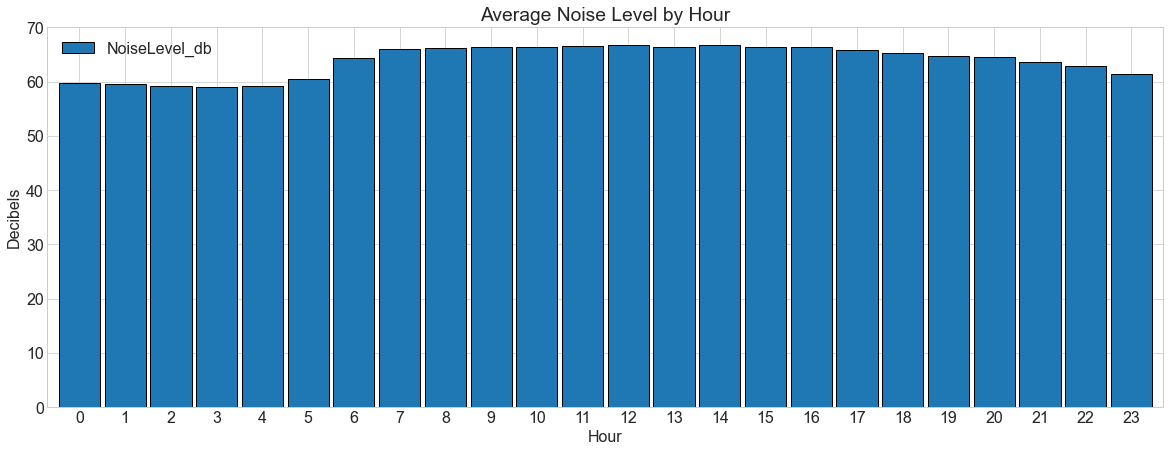

In [10]:
woosh = sound_df.resample('H').mean()
ax = woosh.groupby(woosh.index.hour).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Noise Level by Hour', xlabel='Hour', ylabel='Decibels')

[Text(0.5, 1.0, 'Average Noise Level by Day of Week'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'Decibels')]

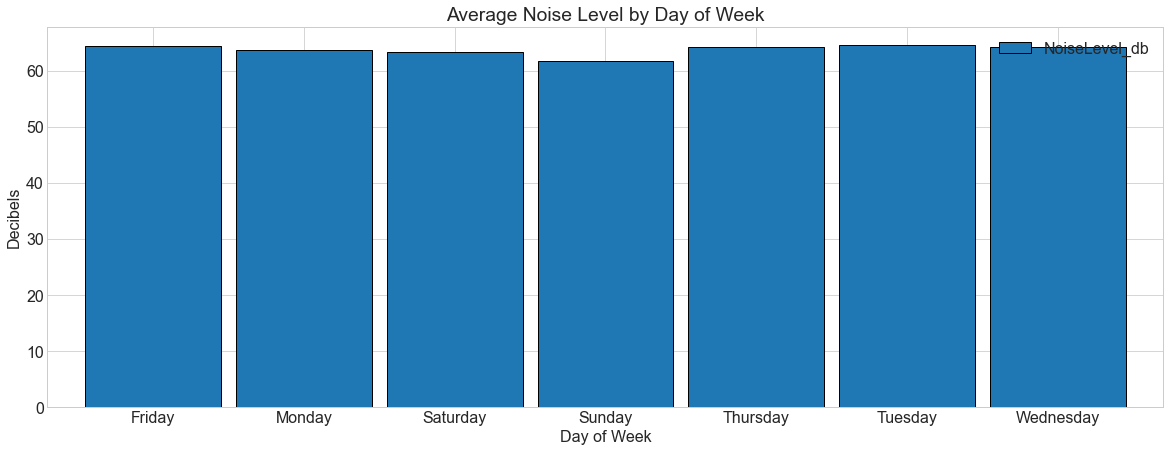

In [11]:
ax = sound_df.groupby(sound_df.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Noise Level by Day of Week', xlabel='Day of Week', ylabel='Decibels')

In [89]:
flood_df = wrangle.clean_flood()
flood_df = flood_df.set_index('datetime')

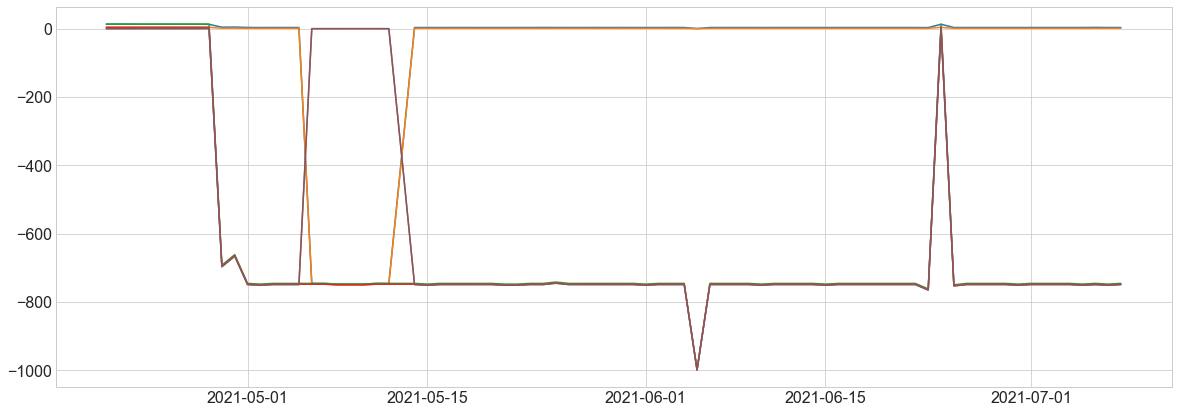

In [14]:
plt.plot(flood_df.resample('D').mean())

In [90]:
flood_df

,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
datetime,,,,,,
2021-05-20 00:11:55,13.188976,4.0200,13.500656,4.115,0.311680,0.0950
2021-05-20 00:26:55,13.254593,4.0400,13.500656,4.115,0.246063,0.0750
2021-05-20 00:41:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
2021-05-20 00:56:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
2021-05-20 01:11:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
...,...,...,...,...,...,...
2021-07-08 23:35:00,0.216700,0.0660,-999.000000,-999.000,-999.216700,-999.0660
2021-07-08 23:40:00,0.216700,0.0660,-999.000000,-999.000,-999.216700,-999.0660
2021-07-08 23:45:00,0.233300,0.0711,-999.000000,-999.000,-999.233300,-999.0711


In [17]:
air_df = wrangle.clean_air()
air_df.datetime = pd.to_datetime(air_df.datetime)
air_df = air_df.set_index('datetime')
air_df = air_df.sort_index()
air1_df = air_df[(air_df['Pm1_0'] < 500) & (air_df['Pm1_0'] > -50)]

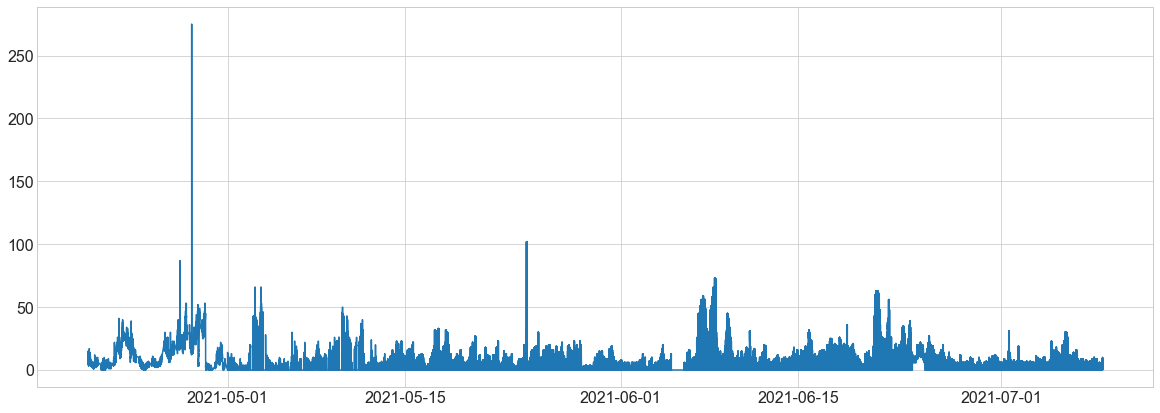

In [18]:
plt.plot(air1_df.index, air1_df.Pm1_0)

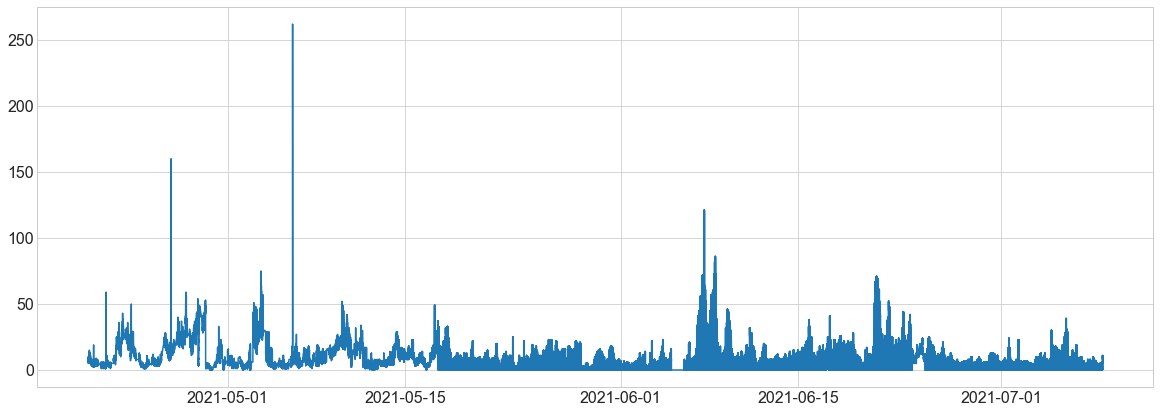

In [19]:
air25_df = air_df[(air_df['Pm2_5'] < 500) & (air_df['Pm2_5'] > -50)]
plt.plot(air25_df.index, air25_df.Pm2_5)

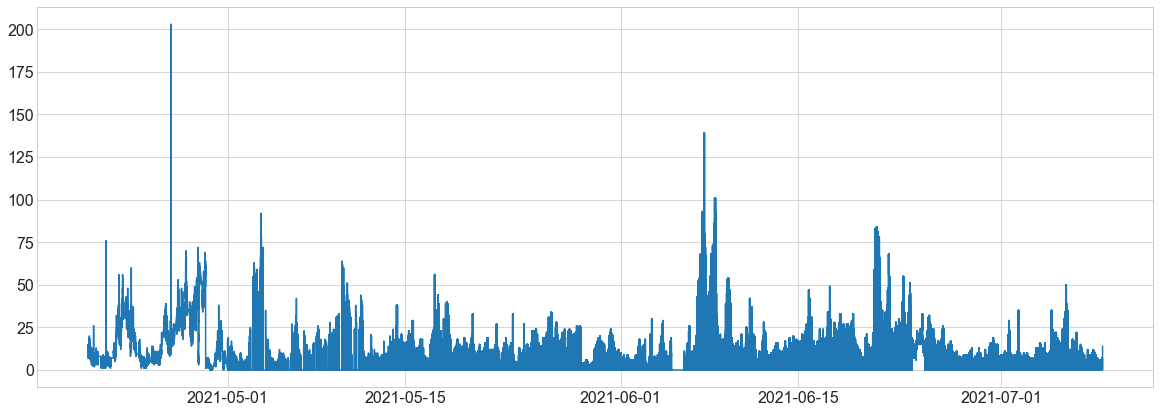

In [20]:
air10_df = air_df[(air_df['Pm10'] < 500) & (air_df['Pm10'] > -50)]
plt.plot(air10_df.index, air10_df.Pm10)

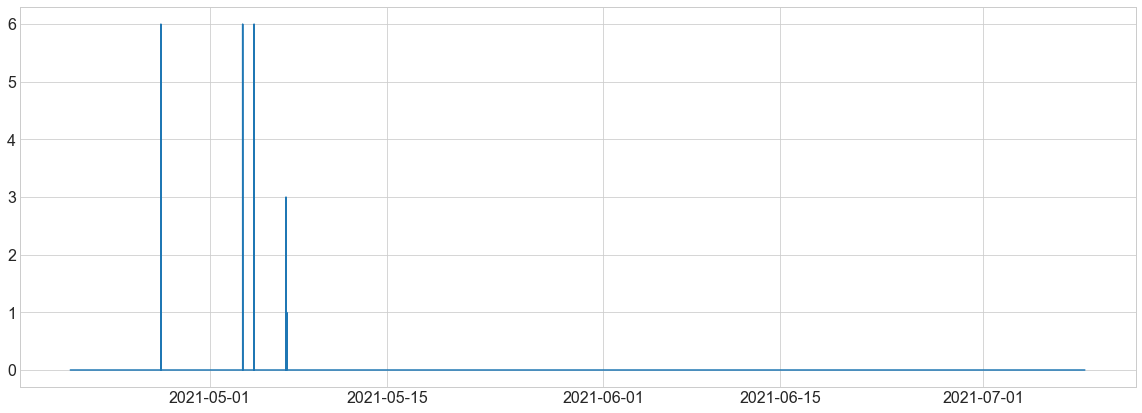

In [21]:
plt.plot(air_df.index, air_df.SO2)

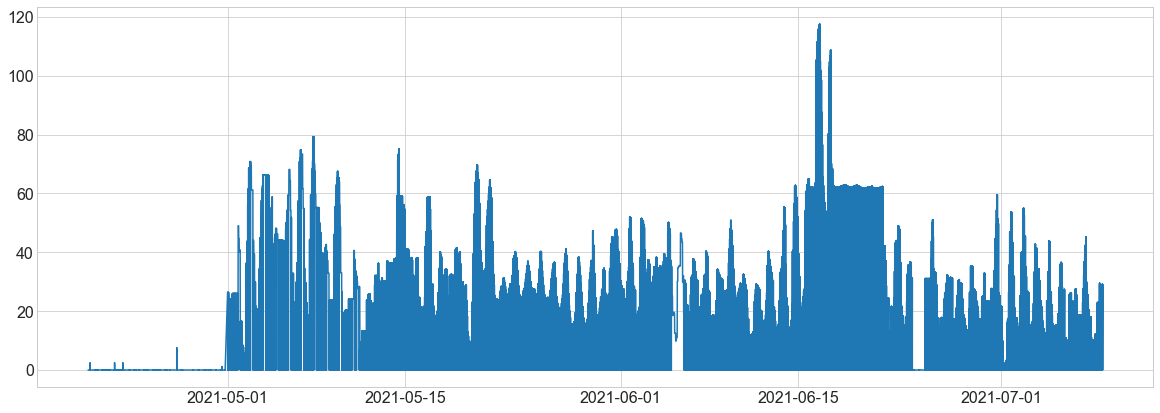

In [22]:
plt.plot(air_df.index, air_df.O3)

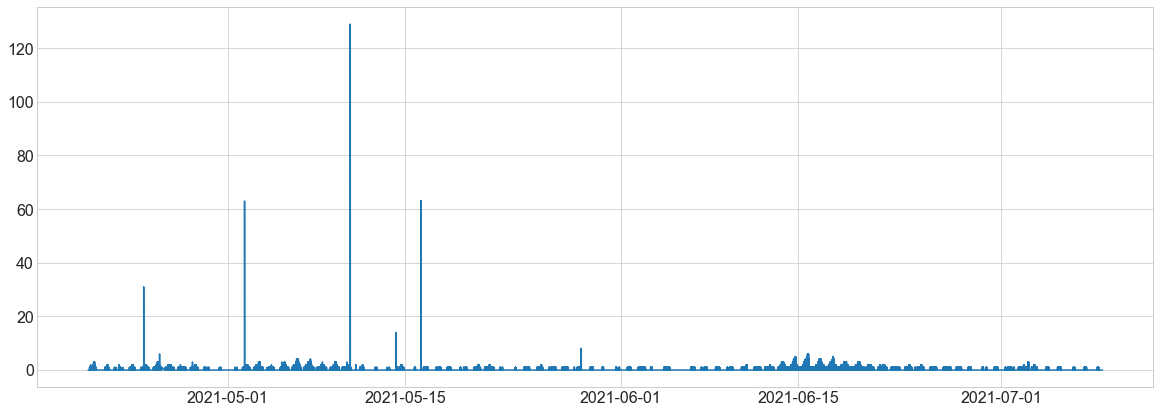

In [23]:
plt.plot(air_df.index, air_df.CO)

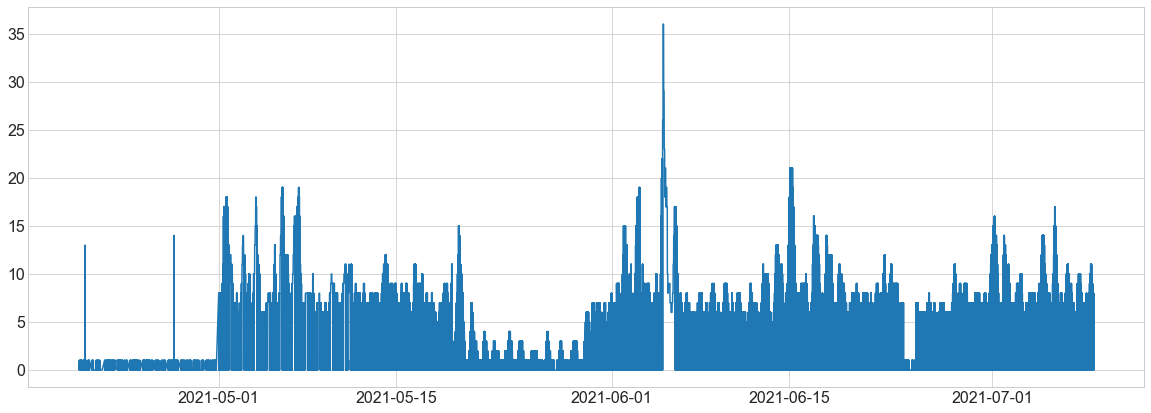

In [24]:
plt.plot(air_df.index, air_df.NO2)

In [91]:
weather_df = wrangle.wrangle_weather()

In [26]:
weather_df.dewpoint_celsius.isna().sum()

0

In [92]:
weather_df

,datetime,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,Time,Date,Temp,Weather,Wind,Humidity,Barometer,Visibility
DateTime,,,,,,,,,,,,,,,
2021-04-20,2021-04-20 00:03:06,17.0,62.0,49.0,6.200402,43.160724,979.0,11:51 PM,4/19/2021,62 °F,Passing clouds.,8 mph,46%,"29.98 ""Hg",10 mi
2021-04-20,2021-04-20 00:07:47,17.0,62.0,49.0,6.200402,43.160724,979.0,11:51 PM,4/19/2021,62 °F,Passing clouds.,8 mph,46%,"29.98 ""Hg",10 mi
2021-04-20,2021-04-20 00:16:47,16.0,62.0,49.0,5.281568,41.506822,979.0,11:51 PM,4/19/2021,62 °F,Passing clouds.,8 mph,46%,"29.98 ""Hg",10 mi
2021-04-20,2021-04-20 00:27:06,16.0,61.0,50.0,5.572908,42.031234,979.0,11:51 PM,4/19/2021,62 °F,Passing clouds.,8 mph,46%,"29.98 ""Hg",10 mi
2021-04-20,2021-04-20 00:03:06,17.0,62.0,48.0,5.901560,42.622809,980.0,11:51 PM,4/19/2021,62 °F,Passing clouds.,8 mph,46%,"29.98 ""Hg",10 mi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-09,2021-07-08 23:35:00,24.0,75.4,91.1,0.000000,0.000000,0.0,11:51 PM,7/8/2021,75 °F,Rain. Fog.,9 mph,94%,"29.89 ""Hg",3 mi
2021-07-09,2021-07-08 23:40:00,24.0,75.4,91.1,0.000000,0.000000,0.0,11:51 PM,7/8/2021,75 °F,Rain. Fog.,9 mph,94%,"29.89 ""Hg",3 mi
2021-07-09,2021-07-08 23:45:00,24.0,75.4,91.1,0.000000,0.000000,0.0,11:51 PM,7/8/2021,75 °F,Rain. Fog.,9 mph,94%,"29.89 ""Hg",3 mi


In [28]:
flood_df

,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
datetime,,,,,,
2021-05-20 00:11:55,13.188976,4.0200,13.500656,4.115,0.311680,0.0950
2021-05-20 00:26:55,13.254593,4.0400,13.500656,4.115,0.246063,0.0750
2021-05-20 00:41:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
2021-05-20 00:56:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
2021-05-20 01:11:55,13.221785,4.0300,13.500656,4.115,0.278871,0.0850
...,...,...,...,...,...,...
2021-07-08 23:35:00,0.216700,0.0660,-999.000000,-999.000,-999.216700,-999.0660
2021-07-08 23:40:00,0.216700,0.0660,-999.000000,-999.000,-999.216700,-999.0660
2021-07-08 23:45:00,0.233300,0.0711,-999.000000,-999.000,-999.233300,-999.0711


In [29]:
sound_df

,NoiseLevel_db,noise_level
DateTime,,
2021-04-20 00:00:43,63,Moderate
2021-04-20 00:07:45,58,Moderate
2021-04-20 00:08:26,58,Moderate
2021-04-20 00:10:43,59,Moderate
2021-04-20 00:17:46,55,Moderate
...,...,...
2021-07-08 23:56:14,66,Moderate
2021-07-08 23:56:14,65,Moderate
2021-07-08 23:59:13,66,Moderate


In [30]:
air_df

,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,dates,time,...,weekday,AQI_CO,CO_24hr,AQI_CO_24hr,AQI_pm2_5,Pm_25_24hr,AQI_pm_25_24hr,AQI_pm10,Pm_10_24hr,AQI_pm10_24hr
datetime,,,,,,,,,,,,,,,,,,,,,
2021-04-20 00:00:43,7,6,8,0,0.0,0,0,None,2021-04-20,00:00:43,...,1,Good,0.299145,Good,Good,8.022792,Good,Good,7.324786,Good
2021-04-20 00:07:45,15,10,15,0,0.0,0,1,no2,2021-04-20,00:07:45,...,1,Good,0.299145,Good,Good,8.022792,Good,Good,7.324786,Good
2021-04-20 00:08:26,8,7,9,0,0.0,0,0,None,2021-04-20,00:08:26,...,1,Good,0.299145,Good,Good,8.022792,Good,Good,7.324786,Good
2021-04-20 00:10:43,5,8,11,0,0.0,0,0,None,2021-04-20,00:10:43,...,1,Good,0.299145,Good,Good,8.022792,Good,Good,7.324786,Good
2021-04-20 00:17:46,4,8,10,0,0.0,0,1,no2,2021-04-20,00:17:46,...,1,Good,0.299145,Good,Good,8.022792,Good,Good,7.324786,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-08 23:56:14,8,8,10,0,0.0,0,0,None,2021-07-08,23:56:14,...,3,Good,0.023188,Good,Good,3.906087,Good,Good,4.773333,Good
2021-07-08 23:56:14,10,11,14,0,0.0,0,1,no2,2021-07-08,23:56:14,...,3,Good,0.023188,Good,Good,3.906087,Good,Good,4.773333,Good
2021-07-08 23:59:13,9,6,8,0,0.0,0,0,None,2021-07-08,23:59:13,...,3,Good,0.023188,Good,Good,3.906087,Good,Good,4.773333,Good


In [52]:
weather_day_df = weather_df.resample('D', on='datetime').mean()
flood_day_df = flood_df.resample('D').mean()
sound_day_df = sound_df.resample('D').mean()
air_day_df = air_df.resample('D').mean().drop(columns = ['hour', 'weekday', 'CO_24hr', 'Pm_25_24hr', 'Pm_10_24hr', 'SO2', 'O3', 'NO2'])

In [53]:
air_day_df

,Pm1_0,Pm2_5,Pm10,CO
datetime,,,,
2021-04-20,5.193732,8.022792,7.324786,0.299145
2021-04-21,2.968750,3.616477,4.460227,0.144886
2021-04-22,16.866477,18.247159,22.963068,0.056818
2021-04-23,18.123563,19.209770,23.916667,0.166667
2021-04-24,3.804533,4.458924,51.232295,0.405099
...,...,...,...,...
2021-07-04,5.982609,6.902029,8.548986,0.069565
2021-07-05,10.007536,10.895072,13.280580,0.069565
2021-07-06,9.242319,10.684638,12.732174,0.022609


In [81]:
weather_day_df.join(air_day_df).join(hazards).join(sound_day_df).join(flood_day_df)

,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,Pm1_0,Pm2_5,Pm10,CO,most_hazardous_pm2.5_level,most_hazardous_pm10_level,most_hazardous_CO_level,NoiseLevel_db,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
datetime,,,,,,,,,,,,,,,,,,,,
2021-04-20,20.885417,69.564583,45.793750,7.665854,45.798537,988.077083,5.193732,8.022792,7.324786,0.299145,Hazardous,Good,Good,66.233618,13.238362,4.035053,13.500656,4.115000,0.262295,0.079947
2021-04-21,15.318872,59.603037,36.488069,-0.314139,31.434551,985.501085,2.968750,3.616477,4.460227,0.144886,Unhealthy,Moderate,Good,66.661932,13.342082,4.066667,13.500656,4.115000,0.158574,0.048333
2021-04-22,16.003454,60.851468,67.740933,9.639262,49.350672,979.645941,16.866477,18.247159,22.963068,0.056818,Unhealthy for Sensitive Groups,Moderate,Good,66.201705,13.295604,4.052500,13.500656,4.115000,0.205052,0.062500
2021-04-23,22.505393,72.463790,85.761171,19.649763,67.369573,971.275809,18.123563,19.209770,23.916667,0.166667,Unhealthy for Sensitive Groups,Moderate,Good,66.402299,13.001353,3.962812,13.500656,4.115000,0.499303,0.152188
2021-04-24,24.973799,76.965066,50.290393,10.987527,51.777549,974.480349,3.804533,4.458924,51.232295,0.405099,Moderate,Good,Hazardous,64.807365,13.134979,4.003542,13.500656,4.115000,0.365677,0.111458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-04,27.622439,81.815566,77.846741,19.101244,61.028093,813.437561,5.982609,6.902029,8.548986,0.069565,Moderate,Good,Good,60.488696,3.451258,1.051946,-745.874836,-748.221250,-749.326094,-749.273196
2021-07-05,27.751346,81.938654,77.978523,19.198590,61.228917,813.530072,10.007536,10.895072,13.280580,0.069565,Moderate,Good,Good,61.752464,3.464354,1.055932,-747.857540,-750.185574,-751.321893,-751.241506
2021-07-06,25.340453,77.707608,88.190060,19.220105,61.210456,811.911576,9.242319,10.684638,12.732174,0.022609,Unhealthy for Sensitive Groups,Good,Good,64.713043,3.816308,1.163215,-745.874836,-748.221250,-749.691144,-749.384465


In [73]:
air2_5 = air_df.drop(air_df.columns.difference(['Pm2_5', 'AQI_pm2_5']), 1)
air10 = air_df.drop(air_df.columns.difference(['Pm10', 'AQI_pm10']), 1)
airCO = air_df.drop(air_df.columns.difference(['CO', 'AQI_CO']), 1)

In [74]:
series2_5 = air2_5.resample('D').max().rename(columns = {'AQI_pm2_5': 'most_hazardous_pm2.5_level'})['most_hazardous_pm2.5_level']
series10 = air10.resample('D').max().rename(columns = {'AQI_pm10': 'most_hazardous_pm10_level'})['most_hazardous_pm10_level']
seriesCO = airCO.resample('D').max().rename(columns = {'AQI_CO': 'most_hazardous_CO_level'})['most_hazardous_CO_level']

In [75]:
series2_5

datetime
2021-04-20                         Hazardous
2021-04-21                         Unhealthy
2021-04-22    Unhealthy for Sensitive Groups
2021-04-23    Unhealthy for Sensitive Groups
2021-04-24                          Moderate
                           ...              
2021-07-04                          Moderate
2021-07-05                          Moderate
2021-07-06    Unhealthy for Sensitive Groups
2021-07-07                              Good
2021-07-08                              Good
Freq: D, Name: most_hazardous_pm2.5_level, Length: 80, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy for Sensitive Groups' < 'Unhealthy' < 'Very Unhealthy' < 'Hazardous']

In [76]:
series10

datetime
2021-04-20        Good
2021-04-21    Moderate
2021-04-22    Moderate
2021-04-23    Moderate
2021-04-24        Good
                ...   
2021-07-04        Good
2021-07-05        Good
2021-07-06        Good
2021-07-07        Good
2021-07-08        Good
Freq: D, Name: most_hazardous_pm10_level, Length: 80, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy for Sensitive Groups' < 'Unhealthy' < 'Very Unhealthy' < 'Hazardous']

In [77]:
seriesCO

datetime
2021-04-20         Good
2021-04-21         Good
2021-04-22         Good
2021-04-23         Good
2021-04-24    Hazardous
                ...    
2021-07-04         Good
2021-07-05         Good
2021-07-06         Good
2021-07-07         Good
2021-07-08         Good
Freq: D, Name: most_hazardous_CO_level, Length: 80, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy for Sensitive Groups' < 'Unhealthy' < 'Very Unhealthy' < 'Hazardous']

In [79]:
hazards = pd.DataFrame(series2_5).join(series10).join(seriesCO)

In [80]:
hazards

,most_hazardous_pm2.5_level,most_hazardous_pm10_level,most_hazardous_CO_level
datetime,,,
2021-04-20,Hazardous,Good,Good
2021-04-21,Unhealthy,Moderate,Good
2021-04-22,Unhealthy for Sensitive Groups,Moderate,Good
2021-04-23,Unhealthy for Sensitive Groups,Moderate,Good
2021-04-24,Moderate,Good,Hazardous
...,...,...,...
2021-07-04,Moderate,Good,Good
2021-07-05,Moderate,Good,Good
2021-07-06,Unhealthy for Sensitive Groups,Good,Good


In [103]:
def full_daily_COSA_dataframe():
    sound_df = wrangle.wrangle_sound()
    sound_df = sound_df.set_index('DateTime')
    sound_df = sound_df.sort_index()
    flood_df = wrangle.clean_flood()
    flood_df = flood_df.set_index('datetime')
    weather_df = wrangle.wrangle_weather()
    air_df = wrangle.clean_air()
    air_df.datetime = pd.to_datetime(air_df.datetime)
    air_df = air_df.set_index('datetime')
    air_df = air_df.sort_index()
    weather_day_df = weather_df.resample('D', on='datetime').mean()
    flood_day_df = flood_df.resample('D').mean()
    sound_day_df = sound_df.resample('D').mean()
    air_day_df = air_df.resample('D').mean().drop(columns = ['hour', 'weekday', 'CO_24hr', 'Pm_25_24hr', 'Pm_10_24hr', 'SO2', 'O3', 'NO2'])
    air2_5 = air_df.drop(air_df.columns.difference(['Pm2_5', 'AQI_pm2_5']), 1)
    air10 = air_df.drop(air_df.columns.difference(['Pm10', 'AQI_pm10']), 1)
    airCO = air_df.drop(air_df.columns.difference(['CO', 'AQI_CO']), 1)
    series2_5 = air2_5.resample('D').max().rename(columns = {'AQI_pm2_5': 'most_hazardous_pm2.5_level'})['most_hazardous_pm2.5_level']
    series10 = air10.resample('D').max().rename(columns = {'AQI_pm10': 'most_hazardous_pm10_level'})['most_hazardous_pm10_level']
    seriesCO = airCO.resample('D').max().rename(columns = {'AQI_CO': 'most_hazardous_CO_level'})['most_hazardous_CO_level']
    hazards = pd.DataFrame(series2_5).join(series10).join(seriesCO)
    df = weather_day_df.join(air_day_df).join(hazards).join(sound_day_df).join(flood_day_df)
    df = df.round({'celsius': 2, 'farenheit': 2, 'humidity': 2, 'dewpoint_celsius': 2, 'dewpoint_farenheit': 2,
          'pressure': 2, 'NoiseLevel_db': 2, 'sensor_to_water_feet': 2, 'sensor_to_water_meters': 2,
          'sensor_to_ground_feet': 2, 'sensor_to_ground_meters': 2, 'flood_depth_feet': 2,
          'flood_depth_meters': 2})
    return df

In [104]:
df = full_daily_COSA_dataframe()

In [105]:
df

,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,Pm1_0,Pm2_5,Pm10,CO,most_hazardous_pm2.5_level,most_hazardous_pm10_level,most_hazardous_CO_level,NoiseLevel_db,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
datetime,,,,,,,,,,,,,,,,,,,,
2021-04-20,20.89,69.56,45.79,7.67,45.80,988.08,5.193732,8.022792,7.324786,0.299145,Hazardous,Good,Good,66.23,13.24,4.04,13.50,4.12,0.26,0.08
2021-04-21,15.32,59.60,36.49,-0.31,31.43,985.50,2.968750,3.616477,4.460227,0.144886,Unhealthy,Moderate,Good,66.66,13.34,4.07,13.50,4.12,0.16,0.05
2021-04-22,16.00,60.85,67.74,9.64,49.35,979.65,16.866477,18.247159,22.963068,0.056818,Unhealthy for Sensitive Groups,Moderate,Good,66.20,13.30,4.05,13.50,4.12,0.21,0.06
2021-04-23,22.51,72.46,85.76,19.65,67.37,971.28,18.123563,19.209770,23.916667,0.166667,Unhealthy for Sensitive Groups,Moderate,Good,66.40,13.00,3.96,13.50,4.12,0.50,0.15
2021-04-24,24.97,76.97,50.29,10.99,51.78,974.48,3.804533,4.458924,51.232295,0.405099,Moderate,Good,Hazardous,64.81,13.13,4.00,13.50,4.12,0.37,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-04,27.62,81.82,77.85,19.10,61.03,813.44,5.982609,6.902029,8.548986,0.069565,Moderate,Good,Good,60.49,3.45,1.05,-745.87,-748.22,-749.33,-749.27
2021-07-05,27.75,81.94,77.98,19.20,61.23,813.53,10.007536,10.895072,13.280580,0.069565,Moderate,Good,Good,61.75,3.46,1.06,-747.86,-750.19,-751.32,-751.24
2021-07-06,25.34,77.71,88.19,19.22,61.21,811.91,9.242319,10.684638,12.732174,0.022609,Unhealthy for Sensitive Groups,Good,Good,64.71,3.82,1.16,-745.87,-748.22,-749.69,-749.38
